In [17]:
from pprint import pprint
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
client = MongoClient()
db = client.testYelp




def getBusinessByCity(city):
    return list(db.business.find({"city": city}))

def getReviewsByBusId(busids):
    reviews = list(db.review.find({"business_id":{"$in":busids}}))
    #reviews[busid] = [x for x in db.review.find({"business_id": { "$"in : busids}})]
    return reviews

def getTipsByBusId(busids):
    tips = list(db.tip.find({"business_id":{"$in":busids}}))
    #reviews[busid] = [x for x in db.review.find({"business_id": { "$"in : busids}})]
    return tips


def getUsersById(userids):
    users = list(db.user.find({"user_id":{"$in":userids}}))
    #reviews[busid] = [x for x in db.review.find({"business_id": { "$"in : busids}})]
    return users
    

    
    
business=getBusinessByCity('Phoenix')

busids = [x['business_id'] for x in business]

reviews = getReviewsByBusId(busids)

tips = getTipsByBusId(busids)


usersR = [x['user_id'] for x in reviews]
usersT = [x['user_id'] for x in tips]

userIds = list(set(usersR + usersT))


users = getUsersById(userIds)


pprint(str(len(business))+ ' business.length')
pprint(str(len(reviews))+ ' reviews.length')
pprint(str(len(tips))+ ' tips.length')
pprint(str(len(users))+ ' users.length')







'15656 business.length'
'519246 reviews.length'
'120173 tips.length'
'189326 users.length'


100293


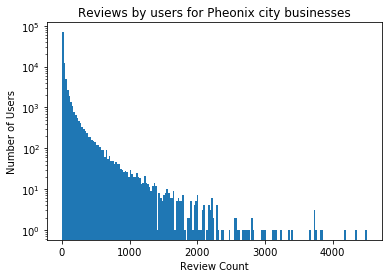

mean 54.3358559421
{'_id': ObjectId('59f769bda5de9007c840398f'),
 'average_stars': 3.76,
 'compliment_cool': 9,
 'compliment_cute': 0,
 'compliment_funny': 9,
 'compliment_hot': 1,
 'compliment_list': 0,
 'compliment_more': 1,
 'compliment_note': 4,
 'compliment_photos': 1,
 'compliment_plain': 11,
 'compliment_profile': 0,
 'compliment_writer': 3,
 'cool': 4,
 'elite': [2016, 2017],
 'fans': 11,
 'friends': ['96DJovjKAtExnyBZRfniPQ',
             'Djczq-bRn761U4FW77NUtg',
             'dvOmaLaQwJqydq2bM2yAoQ',
             'NNRVb7Z6ZgzQNaHjlpEcgg',
             '9eg1MTZwxLHph77Kd9zSDw',
             '40_zEXAQEds0AlI5W0vspg',
             'c8ySRVw9WWqUT_pK-2RFvQ',
             '9yygqm3FYSMMIQZaDXkyQg',
             'rYbYxbTST-kcYPUQS1X8pQ',
             '0cShyGVayfuS_L6Qp7YrBA',
             'Wnx517TEj-NsVwKDKSiIuw',
             'FAyE91YAbvT097W0WgTc9A',
             '6x4IXgfHKu-zEDfUPA7pmg',
             'Dz64RxM_8oRgvVT5_5dGvg',
             '-fh8LjJKj34MLGLn-OhaAA',
             'x

In [28]:
li = sorted([int(x['review_count']) for x in users if (int(x['review_count'])>5 and int(x['review_count'])<5001 )])
print (len(li))
plt.hist(li,bins=190)
plt.xlabel('Review Count')
plt.ylabel('Number of Users')
plt.yscale('log', nonposy='clip')
plt.title('Reviews by users for Pheonix city businesses')
plt.show()

meanli = np.mean(li)
print('mean '+str(meanli))

pprint(users[0])

10823


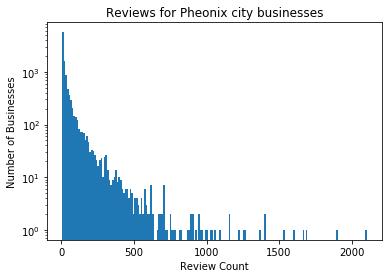

mean 46.2770950753 max 2103 min 6


In [33]:
lis = sorted([int(x['review_count']) for x in business if (int(x['review_count'])>5 and int(x['review_count'])<5001 )])
print (len(lis))
plt.hist(lis,bins=190)
plt.xlabel('Review Count')
plt.ylabel('Number of Businesses')
plt.yscale('log', nonposy='clip')
plt.title('Reviews for Pheonix city businesses')
plt.show()

meanlis = np.mean(lis)
maxlis=np.max(lis)
minlis=np.min(lis)
print('mean '+str(meanlis) + ' max '+str(maxlis) + ' min '+str(minlis))

In [31]:
totalrev = sum(lis)
print (totalrev)

500857
